In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
from PIL import Image
import os
import sys

sys.path.append(str(Path("delete.ipynb").resolve().parent.parent))

## Elements Debug

In [ ]:
from cav_models import MultiPatternCAV, PatternCAV

model1 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.0.pt", map_location="cpu", weights_only=False)
model2 = torch.load("../results/diffae/dir_models/pattern_cav:alpha10.0.pt", map_location="cpu", weights_only=False)
model3 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.1.pt", map_location="cpu", weights_only=False)
model4 = torch.load("../results/diffae/dir_models/pattern_cav:alpha1.0.pt", map_location="cpu", weights_only=False)
model5 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.01.pt", map_location="cpu", weights_only=False)
cavs1 = model1.weights
cavs2 = model2.weights
cavs3 = model3.weights
cavs4 = model4.weights
cavs5 = model5.weights

print(f"cavs1 norm: {torch.norm(cavs1, dim=1)}")
print(f"cavs2 norm: {torch.norm(cavs2, dim=1)}")
print(f"cavs3 norm: {torch.norm(cavs3, dim=1)}")
print(f"cavs4 norm: {torch.norm(cavs4, dim=1)}")
print(f"cavs5 norm: {torch.norm(cavs5, dim=1)}")

cavs1.shape, cavs2.shape

cavs1 norm: tensor([0.2810, 0.2227, 0.2885, 0.1681, 0.4855, 0.3247, 0.1473, 0.1910, 0.3522,
        0.5296, 0.5024, 0.1979, 0.2297, 0.2699, 0.2829, 0.2797, 0.2327, 0.5403,
        0.3106, 0.2172, 0.3620, 0.1544, 0.2451, 0.0922, 0.2433, 0.1370, 0.4470,
        0.1392, 0.3123, 0.3025, 0.2180, 0.2283, 0.1590, 0.2425, 0.1966, 0.5797,
        0.3386, 0.2132, 0.4087, 0.2915], grad_fn=<LinalgVectorNormBackward0>)
cavs2 norm: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<LinalgVectorNormBackward0>)
cavs3 norm: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        

(torch.Size([40, 512]), torch.Size([40, 512]))

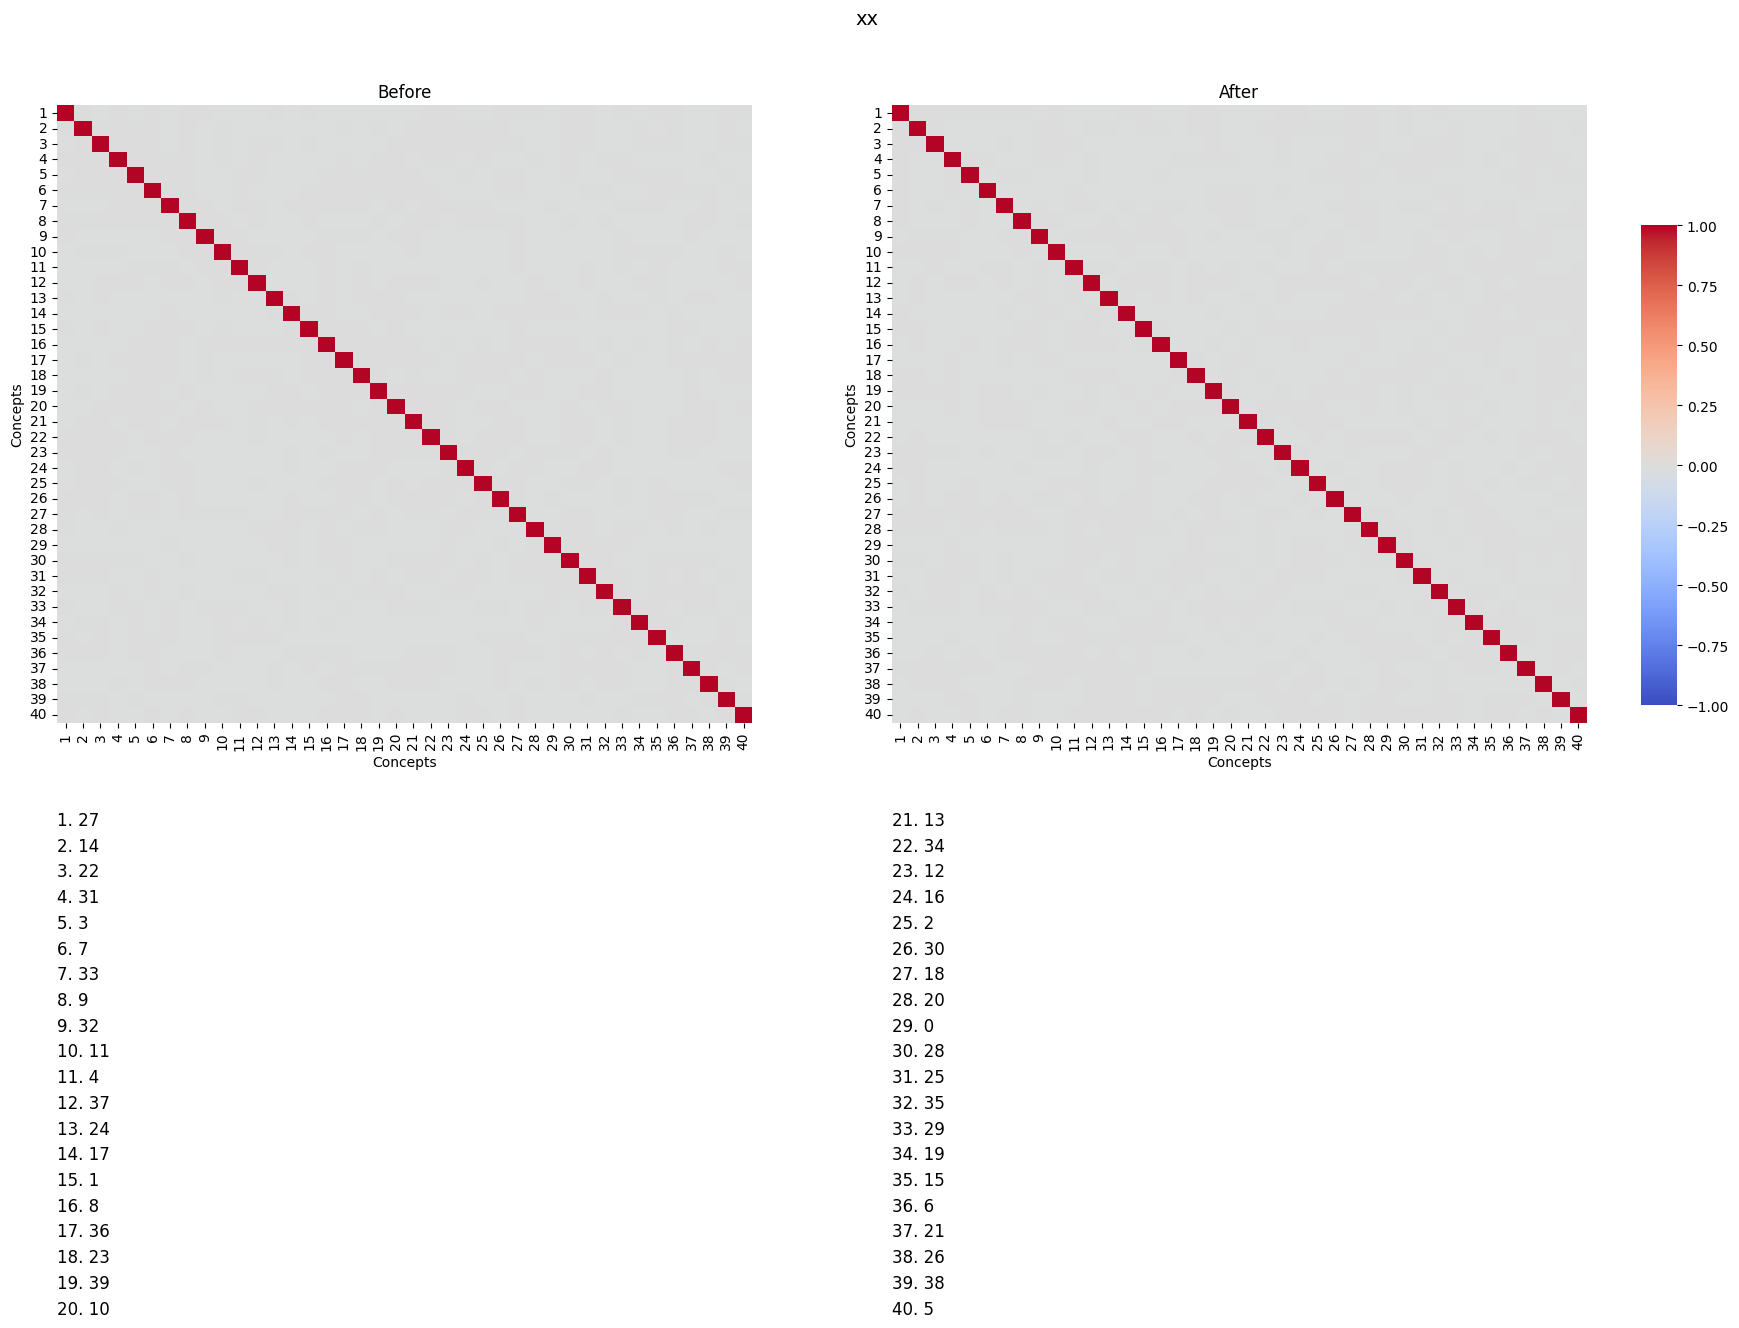

In [35]:
from utils.visualizations import visualize_before_after_sim_matrices

C1 = cavs1 @ cavs1.T
C2 = cavs2 @ cavs2.T
C3 = cavs3 @ cavs3.T
C4 = cavs4 @ cavs4.T
C5 = cavs5 @ cavs5.T

visualize_before_after_sim_matrices(C2.detach(), C5.detach(), labels=[str(i) for i in range(40)], title="xx")

In [2]:
from omegaconf import DictConfig, OmegaConf
from models import get_fn_model_loader

cfg_model = OmegaConf.load("/home/erogullari/Workspace/cav-disentanglement/configs/model/resnet18.yaml")
model = get_fn_model_loader(cfg_model.name)(pretrained=False, n_class = cfg_model.n_class)
state_dict = torch.load("/home/erogullari/Workspace/cav-disentanglement/checkpoints/checkpoint_resnet18_elements.pth")
model.load_state_dict(state_dict['model_state_dict'])

/home/erogullari/miniconda3/envs/xai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [3]:
import inspect
import random
from pathlib import Path
from typing import Dict, Optional, Tuple
from omegaconf import DictConfig, OmegaConf
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from hydra.utils import get_original_cwd
from datasets.elements import get_elements_dataset

cfg_dataset = OmegaConf.load("/home/erogullari/Workspace/cav-disentanglement/configs/dataset/elements.yaml")
cfg_dataset.num_samples = 2000

def _call_with_matching_kwargs(fn, kwargs: Dict) -> object:
    signature = inspect.signature(fn)
    if any(p.kind == inspect.Parameter.VAR_KEYWORD for p in signature.parameters.values()):
        return fn(**kwargs)
    allowed = {
        name
        for name, param in signature.parameters.items()
        if param.kind in (inspect.Parameter.POSITIONAL_OR_KEYWORD, inspect.Parameter.KEYWORD_ONLY)
    }
    filtered = {k: v for k, v in kwargs.items() if k in allowed}
    return fn(**filtered)

dataset = _call_with_matching_kwargs(get_elements_dataset, OmegaConf.to_container(cfg_dataset, resolve=True)) # type: ignore

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


50-th class: {'color': 'magenta', 'shape': 'circle', 'texture': None}
56-th class: {'color': 'red', 'shape': 'triangle', 'texture': 'stripes_diagonal'}
57-th class: {'color': 'red', 'shape': 'triangle', 'texture': None}
80-th class: {'color': None, 'shape': 'triangle', 'texture': 'stripes_diagonal'}
98-th class: {'color': 'cyan', 'shape': 'plus', 'texture': 'spots_polka'}
100-th class: {'color': 'cyan', 'shape': 'plus', 'texture': None}
106-th class: {'color': None, 'shape': 'plus', 'texture': 'spots_polka'}
137-th class: {'color': 'red', 'shape': None, 'texture': 'stripes_diagonal'}
148-th class: {'color': 'cyan', 'shape': None, 'texture': 'spots_polka'}


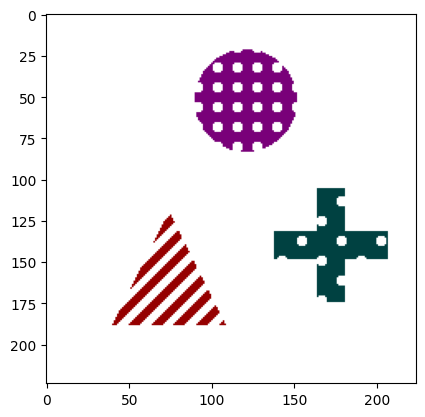

In [4]:
sample, target = dataset[1]
all_classes = cfg_dataset.class_configs
target_classes = [(i, all_classes[i]) for i, cls in enumerate(target) if cls == 1.0]
for i, cls in target_classes:
    print(f"{i}-th class: {cls}")

plt.imshow(sample.permute(1,2,0).numpy())

In [5]:
logits = model(sample.unsqueeze(0)).squeeze(0)
probs = torch.sigmoid(logits)
print(probs)
pred_cls = torch.where(probs > 0.5)
print(pred_cls)

tensor([0.4482, 0.4089, 0.4987, 0.4747, 0.4378, 0.4866, 0.4706, 0.4934, 0.5071,
        0.4875, 0.4522, 0.4929, 0.4727, 0.4832, 0.4729, 0.4776, 0.4843, 0.4258,
        0.4735, 0.5038, 0.4464, 0.4731, 0.4684, 0.4855, 0.4716, 0.4779, 0.4824,
        0.5068, 0.4642, 0.4572, 0.4919, 0.4861, 0.4912, 0.4850, 0.4868, 0.5041,
        0.4821, 0.4697, 0.5130, 0.5038, 0.5103, 0.4745, 0.4933, 0.4914, 0.4986,
        0.4560, 0.5172, 0.4699, 0.4884, 0.4692, 0.4992, 0.5039, 0.4916, 0.4823,
        0.5023, 0.4571, 0.5299, 0.4979, 0.4881, 0.4745, 0.5522, 0.5125, 0.4969,
        0.4731, 0.5179, 0.5125, 0.5319, 0.4652, 0.4580, 0.4981, 0.5228, 0.4719,
        0.4594, 0.4949, 0.4856, 0.4740, 0.5432, 0.4889, 0.5227, 0.4849, 0.5150,
        0.4497, 0.5111, 0.4918, 0.4902, 0.4731, 0.5094, 0.4823, 0.5007, 0.5077,
        0.5091, 0.4539, 0.5009, 0.4852, 0.4844, 0.4626, 0.4940, 0.5119, 0.4972,
        0.5296, 0.5185, 0.5053, 0.4745, 0.5260, 0.4945, 0.4934, 0.5055, 0.5099,
        0.5151, 0.5183, 0.4604, 0.4918, 

dict_keys(['model_state_dict'])

## Diffae Debug

In [6]:
vars = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/vars_celeba_diffae.pt", weights_only=True)
encs1 = vars["encs"]
labels1 = vars["labels"]
encs1.shape, labels1.shape, labels1[0]

(torch.Size([202599, 512]),
 torch.Size([202599, 40]),
 tensor([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
         1., 0., 0., 1.]))

In [58]:
encs2 = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/diffae_latents.pt", weights_only=True)
labels2 = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/diffae_labels.pt", weights_only=True).clamp(0)
encs2.shape, labels2.shape, labels2[0]

(torch.Size([202599, 512]),
 torch.Size([202599, 40]),
 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 1.]))

In [59]:
vars = {
    "encs": encs2,
    "labels": labels2
}
torch.save(vars, "/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/vars_celeba_diffae.pt")

In [27]:
from datasets.celeba.celeba import get_celeba_dataset
from experiments.diffae_original.celeba import CelebADataset as OrigCeleba
from collections import defaultdict
import torch

data_path = "/Users/erogullari/datasets"  # adjust if needed
new_ds = get_celeba_dataset([data_path], normalize_data=True, image_size=128)
orig_ds = OrigCeleba(path_data=data_path, train=True, normalize_data=True, image_size=128)

new_ids = new_ds.get_all_ids()
orig_ids = list(orig_ds.metadata["image_id"])
idx_by_id = defaultdict(list)
for idx, img_id in enumerate(new_ids):
    idx_by_id[img_id].append(idx)

perm_samples = []
for img_id in orig_ids:
    assert idx_by_id[img_id], f"{img_id} missing in new dataset"
    perm_samples.append(idx_by_id[img_id].pop(0))  # pop handles duplicates correctly

new_concepts = new_ds.get_concept_names()
orig_concepts = list(orig_ds.attr_names)  # same names used when original labels were saved
col_idx = {name: i for i, name in enumerate(new_concepts)}
perm_concepts = [col_idx[name] for name in orig_concepts if name in col_idx]


encs_aligned = encs1[perm_samples][:, perm_concepts]
labels_aligned = labels1[perm_samples][:, perm_concepts]

Using subset
Using subset of 162629 samples.
Chosen attribute Blond_Hair with id 9.
[  9702  11490  65856  67871  87824 113519 121665 124322 131833 139857
 140466]
Chosen attribute Blond_Hair with id 9.
Weights: tensor([0.1483, 0.8517])


In [28]:
labels_aligned[0], labels2[0].clamp(0)

(tensor([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
         1., 0., 0., 1.]),
 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 1.]))

In [29]:
len(new_ids), len(orig_ids), len(encs_aligned), len(labels_aligned)

(202599, 162629, 162629, 162629)

In [55]:
import torch
from collections import defaultdict

vars_new = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/vars_celeba_diffae.pt", map_location="cpu")
labels_new = vars_new["labels"].clamp(min=0)

encs_old = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/diffae_latents.pt", map_location="cpu")
labels_old = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/diffae_labels.pt", map_location="cpu").clamp(min=0)

idxs_by_sig = defaultdict(list)
for idx, row in enumerate(labels_new):
    idxs_by_sig[tuple(row.tolist())].append(idx)

perm = torch.tensor([idxs_by_sig[tuple(row.tolist())].pop() for row in labels_old])
# perm[0] happens to be 193880, i.e., original row 0 equals new row 193880.
aligned_new_labels = labels_new[perm]
assert torch.equal(aligned_new_labels, labels_old)
aligned_new_encs = vars_new["encs"][perm]

In [52]:
aligned_new_labels.shape, labels_old.shape

(torch.Size([202599, 40]), torch.Size([202599, 40]))

In [54]:
for i in range(1000):
    if not torch.allclose(aligned_new_labels[i], labels_old[i]):
        print(i)

In [ ]:
for i in range(1000):
    if not torch.allclose(aligned_new_encs[i, :], encs_old[i, :]):
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [72]:
cav_model = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/results/diffae/dir_models/pattern_cav/alpha0.01/state_dict.pth", weights_only=True)
cav_model.keys(), cav_model["weights"].shape, cav_model["bias"].shape

(odict_keys(['weights', 'bias']), torch.Size([40, 512]), torch.Size([40, 512]))

In [86]:
new_model = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/results/diffae/dir_models/pattern_cav/alpha0.00/dir_model_signal_cav.pt", weights_only=True)
cavs_diffae = new_model["weights"].T
bias_diffae = new_model["biases"].T
# print(cavs_diffae.norm(dim=1))
cavs_diffae.shape, bias_diffae.shape

(torch.Size([40, 512]), torch.Size([40, 512]))

In [80]:
from utils.cav import compute_cavs

vars = torch.load("/Users/erogullari/Desktop/Workspace/cav-disentanglement/variables/vars_celeba_diffae.pt", weights_only=True)
encs = vars["encs"].cpu()
labels = vars["labels"].cpu()

cavs_new, bias_new = compute_cavs(encs, labels, type="pattern_cav", normalize=False)
cavs_new

tensor([[-0.0081, -0.0023, -0.0100,  ..., -0.0142, -0.0238,  0.0056],
        [ 0.0053,  0.0031, -0.0068,  ...,  0.0094,  0.0125,  0.0029],
        [ 0.0029,  0.0038, -0.0111,  ...,  0.0004,  0.0144,  0.0089],
        ...,
        [ 0.0025,  0.0118, -0.0110,  ...,  0.0129,  0.0121,  0.0014],
        [-0.0045, -0.0060,  0.0067,  ..., -0.0150, -0.0269,  0.0038],
        [ 0.0103,  0.0106, -0.0069,  ...,  0.0027,  0.0107, -0.0026]])

In [89]:
from typing import OrderedDict

state_dict = {
    "weights": cavs_diffae,
    "bias": bias_diffae
}

torch.save(state_dict, "/Users/erogullari/Desktop/Workspace/cav-disentanglement/results/diffae/dir_models/pattern_cav/alpha0.0/state_dict.pth")